# evaluate

> Evaluate our predictions

In [1]:
#| default_exp evaluate

In [20]:
#| export
from pathlib import Path
from sklearn import metrics
import numpy as np
import pandas as pd

In [3]:
data_dir = Path("../data")
assert data_dir.exists()

In [11]:
sample_predictions_path = data_dir / 'sample_predictions.csv'
assert sample_predictions_path.exists()

predictions = pd.read_csv(sample_predictions_path)
predictions.loc[:, 'pred'] = predictions.pred.str.strip()
predictions.loc[:, 'label'] = predictions.label.str.strip()
predictions.head()

,pred,label,idx
0,Order Processing,Order Processing,0
1,Billing / Invoice,Order Processing,1
2,Order Processing,Order Processing,2
3,Order Processing,Order Processing,3
4,Order Processing,Order Processing,4


In [28]:
performance_kwargs = {
    'y_true': predictions.label,
    'y_pred': predictions.pred
}

Accuracy

In [29]:
metrics.accuracy_score(
    **performance_kwargs
)

0.55

Classification report

In [30]:
performance_report_str = metrics.classification_report(
    zero_division=np.nan,
    output_dict=False,
    **performance_kwargs)
print(performance_report_str)

                   precision    recall  f1-score   support

  Account/Inquiry       0.33      0.33      0.33         3
Billing / Invoice       0.00      0.00       nan         1
         Delivery       1.00      1.00      1.00         1
  General Inquiry       0.00      0.00       nan         1
Order Discrepancy       0.00       nan       nan         0
 Order Processing       0.78      0.64      0.70        11
  Product Inquiry        nan      0.00       nan         1
          Returns       1.00      1.00      1.00         2

         accuracy                           0.55        20
        macro avg       0.44      0.42      0.76        20
     weighted avg       0.66      0.55      0.69        20



Confusion Matrix

In [33]:
matrix = metrics.confusion_matrix(
    **performance_kwargs
)
matrix.diagonal()/matrix.sum(axis=1)

/var/folders/cf/vg67tzns4y134rtjmmt9cd000000gp/T/ipykernel_69452/3028220815.py:4: RuntimeWarning: invalid value encountered in divide
  matrix.diagonal()/matrix.sum(axis=1)


array([0.33333333, 0.        , 1.        , 0.        ,        nan,
       0.63636364, 0.        , 1.        ])

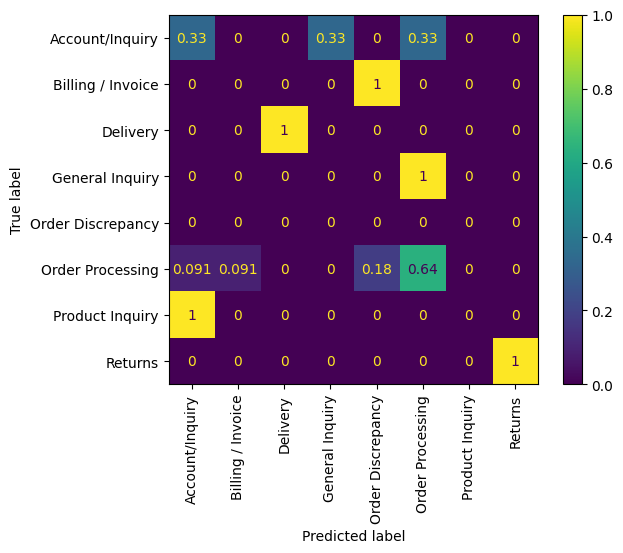

In [48]:
matrix_display = metrics.ConfusionMatrixDisplay.from_predictions(
    normalize='true',
    xticks_rotation='vertical',
    **performance_kwargs
)

In [49]:
#| hide
import nbdev; nbdev.nbdev_export()